# IA

# Lab 2

## k-Nearest Neighbors

In this lab, we are going to classify handwritten digits from the MNIST database using k-NN and Naive Bayes. This dataset consists of 60000 training images and 10000 testing images. Each image is labeled with one of 10 classes (0-9 digit). The images are gray-scale and have 28 pixels high and wide. We are going to use a subset divided as follows:
    
    ‘train_images.npy’ is a matrix of 1000 x 784, containing 1000 training images, each row is an image (28 x 28 = 784).
    ‘test_images.npy’ is a matrix of 500 x 784 containing 500 testing images.
    ‘train_labels.npy’ and ‘test_labels.npy’ contains the ground-truth labels.

![mnist_examples.png](mnist_examples.png)

In [24]:
# import matplotlib and numpy libraries
# you should run it only once

import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
train_images = np.load('data/train_images.npy') # Load training images
train_labels = np.load('data/train_labels.npy') # Load training labels

image = train_images[0, :] # the first image
image = np.reshape(image, (28, 28)) 
plt.imshow(np.uint8(image))
plt.show()
print(train_images.shape)

## k-Nearest Neighbors

The **nearest neighbor** method takes a **test** example, compare it to every single **training** example, and predict the label of the **closest** training example.

In order to find the closest example(s), we have to define (or choose) a **metric**.

Instead of using the closest example in the training set, we can find the top **k** closest examples and predict their majority label (*classification*) or the mean of their labels (*regression*). This strategy is called **k-NN**.



![knn.jpeg](knn.jpeg)

Exemplu care arată diferențele dintre metoda celui mai apropiat vecin și metoda celor mai apropiați cinci vecini. Zona
colorată reprezintă regiunea de decizie a clasificatorului folosind distanța L2. Se observă că în cazul metodei celui mai
apropiat vecin se formează mici ‘insule’ ce pot duce la predicții incorecte. Zonele gri din imaginea 5-NN reprezintă zone de
predicție ambigue din cauza egalității voturilor celor mai apropiați vecini.

The most common distances are:
    $$L_1(X, Y) = \sum_i{\mid X_i - Y_i \mid}$$
    $$L_2(X, Y) = \sqrt{\sum_i{(X_i - Y_i) ^ 2}}$$

## Exercitii

### 1. Creați clasa KnnClassifier, având constructorul următor:

class KnnClassifier:
    
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels

### 1*+. Definiți metoda classify_image(self, test_image, num_neighbors = 3, metric = 'l2') care clasifică imaginea test_image cu metoda celor mai apropiați vecini, numărul vecinilor este stabilit de parametru num_neighbors, iar distanța poatefi L1 sau L2, în funcție de parametrul metric.


In [26]:
# Funcții numpy ajutatoare:

x = np.array([0, 1, 1, 3, 2, 1, 7])
y = np.array([9, 7, 5, 4, 1, 3, 7])

print("Initial arrays we are working with: \n", x, y)

print("\nIndices that would give a sorted array: \n", np.argsort(x)) # returneaza indecsi care sorteaza array-ul
print("\nSorted array: \n", np.sort(x)) # sorteaza array-ul
print("\nCount of each value in an array: \n", np.bincount(x)) # calculeaza numarul de aparatii al fiecarei valori din array
#print(np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))) # array([1, 3, 1, 1, 0, 0, 0, 1])
print("\nIndices that satify the condition x==3: \n", np.where(x == 3)) # returneaza indecsi care satisfac conditia
print("\nIntersection of arrays X and Y: \n", np.intersect1d(x, y)) # returneaza intersectia celor 2 array

np.savetxt('fisier.txt', y) # salveaza array-ul y in fisierul fisier.txt

Initial arrays we are working with: 
 [0 1 1 3 2 1 7] [9 7 5 4 1 3 7]

Indices that would give a sorted array: 
 [0 1 2 5 4 3 6]

Sorted array: 
 [0 1 1 1 2 3 7]

Count of each value in an array: 
 [1 3 1 1 0 0 0 1]

Indices that satify the condition x==3: 
 (array([3], dtype=int64),)

Intersection of arrays X and Y: 
 [1 3 7]


In [55]:
class KnnClassifier:
    
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    
    # (Classify a single image)
    def classify_image(self, test_image, num_neighbors, metric):
        # Calculate distances based on the chosen metric
        diff_arr = []
        
        if metric == "l1":
            for train_image in self.train_images:
                diff_arr.append(np.sum(np.abs(np.subtract(test_image, train_image))))
        else:
            for train_image in self.train_images:
                diff_arr.append(np.sqrt(np.sum(np.subtract(test_image, train_image) ** 2)))
        
        # Find the indices of the nearest neighbors, then use the indices to compute the nearest labels
        
        idx_arr = np.argsort(diff_arr)
        labels = np.array([self.train_labels[idx] for idx in idx_arr][:num_neighbors])
        int_labels = labels.astype(int)
        
        # Find the most common label (mode) among the nearest neighbors

        counts = np.bincount(int_labels)
        estimated_label = np.argmax(counts)

        return estimated_label
        
    
    # B. Write the classify_images(self, test_images, num_neighbors=3, metric='l2') function in order to 
    #    predict the labels of the test images. 

    # (Classify multiple images)
    def classify_images(self, test_images, num_neighbors, metric):
        estimated_labels = [self.classify_image(test_image, num_neighbors, metric) for test_image in test_images]
        return estimated_labels
    
    # C. Define a function to compute the accurracy score given the predicted labels and the ground-truth labels.

    def get_accuracy_score(self, test_images, test_labels, num_neighbors = 3, metric = "l2"):
        estimated_labels = self.classify_images(test_images, num_neighbors, metric)
        
        success_count = 0
        for i, test_label in enumerate(test_labels.astype(int)):
            success_count += test_label == estimated_labels[i]

        return success_count * 100 / len(test_labels)

### 2. Calculați acuratețea metodei celor mai apropiați vecini pe mulțimea de testare având ca distanța ‘l2’ și numărul de vecini 3. Salvați predicțiile în fișierul predictii_3nn_l2_mnist.txt.


In [49]:
import numpy as np

train_images = np.loadtxt('./data/train_images.txt')
train_labels = np.loadtxt('./data/train_labels.txt')
test_images = np.loadtxt('./data/test_images.txt')
test_labels = np.loadtxt('./data/test_labels.txt')

classifier = KnnClassifier(train_images, train_labels)

print(classifier.get_accuracy_score(test_images, test_labels))

89.8


### 3. Compare the accuracy to the KNN from sklearn to verify (should be close/similar)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

train_images = np.loadtxt('./data/train_images.txt')
train_labels = np.loadtxt('./data/train_labels.txt')
test_images = np.loadtxt('./data/test_images.txt')
test_labels = np.loadtxt('./data/test_labels.txt')

NEIGHBORS = 3

classifier = KNeighborsClassifier(NEIGHBORS)

classifier.fit(train_images, train_labels)

neighbors = classifier.kneighbors(test_images)

success_counts = 0

for i in range(0, len(neighbors[0])):
    distances = neighbors[0][i]
    indices = neighbors[1][i]
    labels = [train_labels[idx] for idx in indices]

    idx_arr = np.argsort(distances)
    model_labels = np.array([labels[idx] for idx in idx_arr]).astype(int)

    counts = np.bincount(model_labels)
    estimated_label = np.argmax(counts)

    # print(estimated_label, test_labels[i])

    success_counts += estimated_label == test_labels[i]

print(success_counts * 100 / len(neighbors[0]))


89.8


### 4. Calculați acuratețea metodei celor mai apropiați vecini pe mulțimea de testare având ca distanța L2 și numărul de vecini ∈ [1, 3, 5, 7, 9]

### a. Plotați un grafic cu acuratețea obținută pentru fiecare vecin și salvați scorurile în fișierul acuratete_l2.txt.

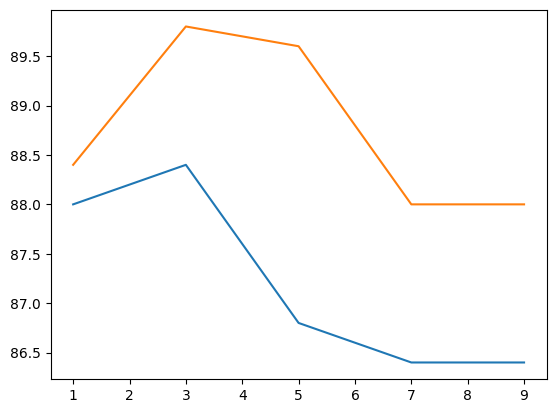

In [58]:
import matplotlib.pyplot as plt
import numpy as np

neighbours = []
accuracies_l1 = []
accuracies_l2 = []

for i in [1, 3, 5, 7, 9]:
    classifier = KnnClassifier(train_images, train_labels)

    neighbours.append(i)
    accuracies_l1.append(classifier.get_accuracy_score(test_images, test_labels, i, "l1"))
    accuracies_l2.append(classifier.get_accuracy_score(test_images, test_labels, i, "l2"))

plt.plot(neighbours, accuracies_l1)
plt.plot(neighbours, accuracies_l2)
plt.show()

### b.  Repetați punctul anterior pentru distanța L1. Plotați graficul de la punctul anterior în aceeași figură cu graficul curent (utilizați fișierul acuratete_l2.txt).

In [54]:
# Write your code here
